# Charts

In [19]:
from verticapy import *

In [20]:
from verticapy.connections import *
new_auto_connection({"host": "34.237.154.116", 
                     "port": "5433", 
                     "database": "testdrive", 
                     "password": "password", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
# Set the primary auto-connection
change_auto_connection("VerticaDSN")

## Regular Charts

In [4]:
read_csv('iris.csv',
          schema = 'public',
          table_name = 'iris')

NameError: The table "public"."iris" already exists !

In [5]:
%matplotlib inline

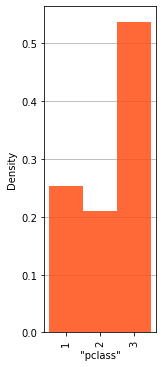

In [7]:
vdf = vDataFrame("public.titanic")
vdf["pclass"].hist()
#vdf["pclass"].pie()

These methods will draw the most occurent categories and merge the others. To change the number of elements to display, you should use the 'max_cardinality' parameter.

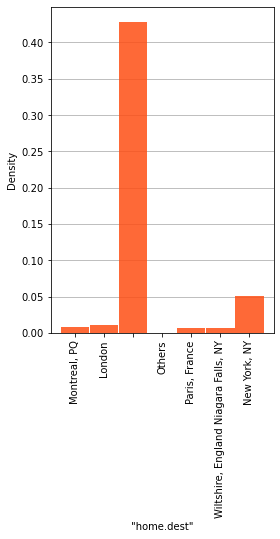

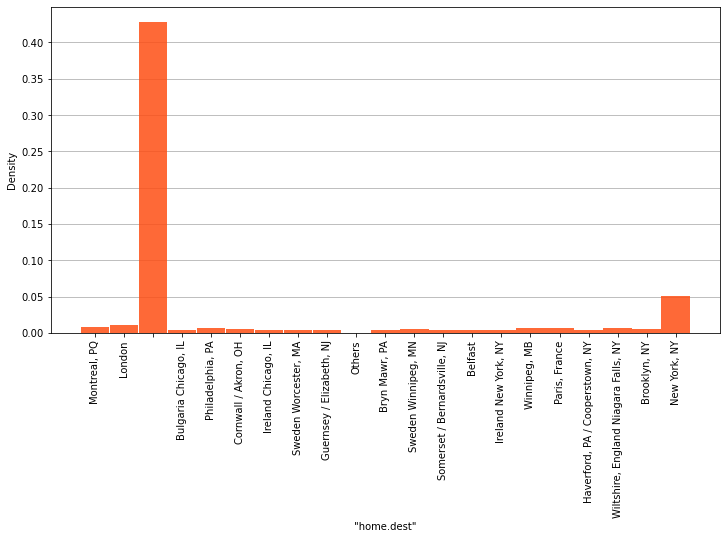

In [8]:
vdf["home.dest"].hist()
vdf["home.dest"].hist(max_cardinality = 20)

When dealing with numerical data types, the process is different. Vertica needs to discretize the numerical features to draw them. You can choose the bar width ('h' parameter) or let VerticaPy compute an optimal one using the Freedman Diaconis method.

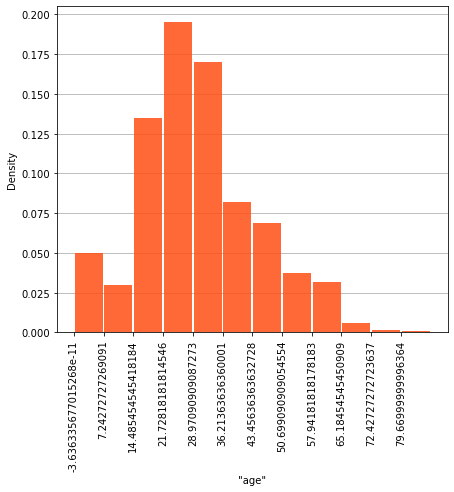

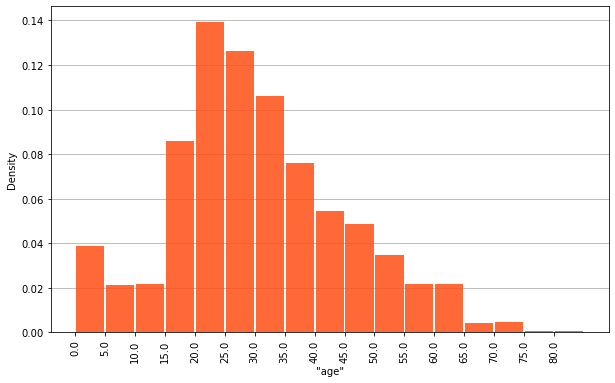

In [9]:
vdf["age"].hist()
vdf["age"].hist(h = 5)

It is possible to change the occurences by another aggregation. The parameters 'method' and 'of' must be changed according to our needs.

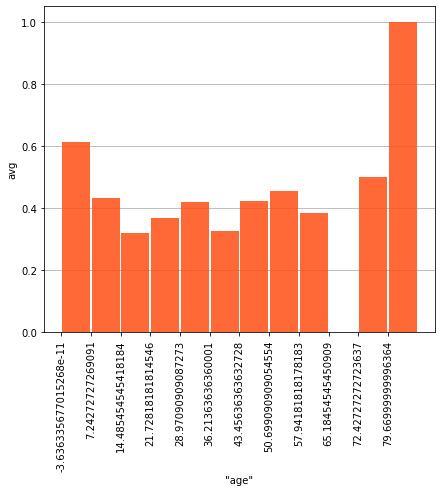

In [10]:
vdf["age"].hist(method = "avg", of = "survived")

VerticaPy is using the same process for other graphics such as 2D Histograms or Bars.

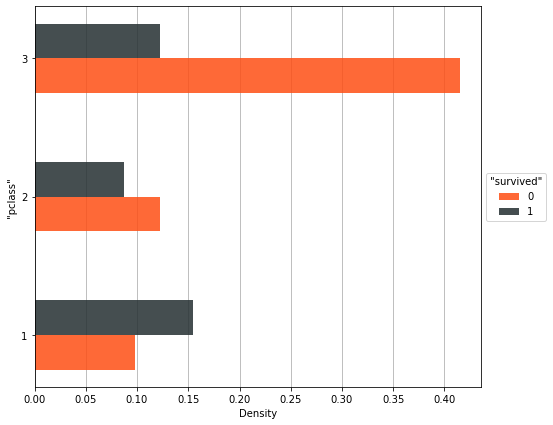

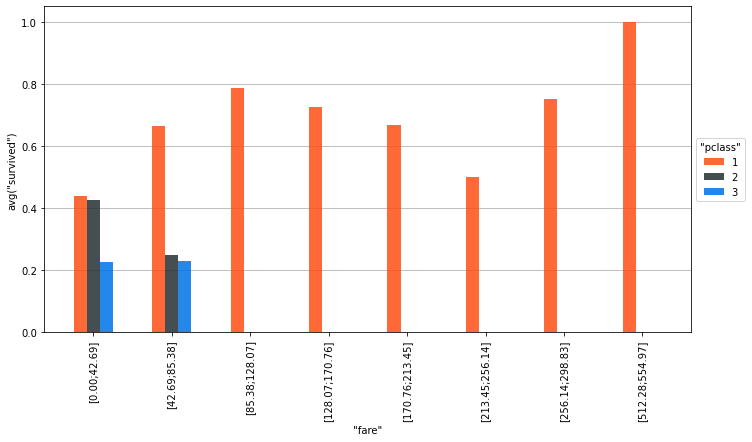

In [11]:
vdf.bar(["pclass", "survived"])
vdf.hist(["fare", "pclass"],
         method = "avg",
         of = "survived")

Pivot Tables are more powerful than histograms or bar charts. They give us aggregated information on all the possible categories.

,"""pclass""/""fare""",[0.00;42.69],[42.69;85.38],[85.38;128.07],[128.07;170.76],[170.76;213.45],[213.45;256.14],[256.14;298.83],[512.28;554.97]
1,1,0.44,0.663716814159292,0.787878787878788,0.724137931034483,0.666666666666667,0.5,0.75,1.0
2,2,0.425101214574899,0.25,,,,,,
3,3,0.227987421383648,0.230769230769231,,,,,,

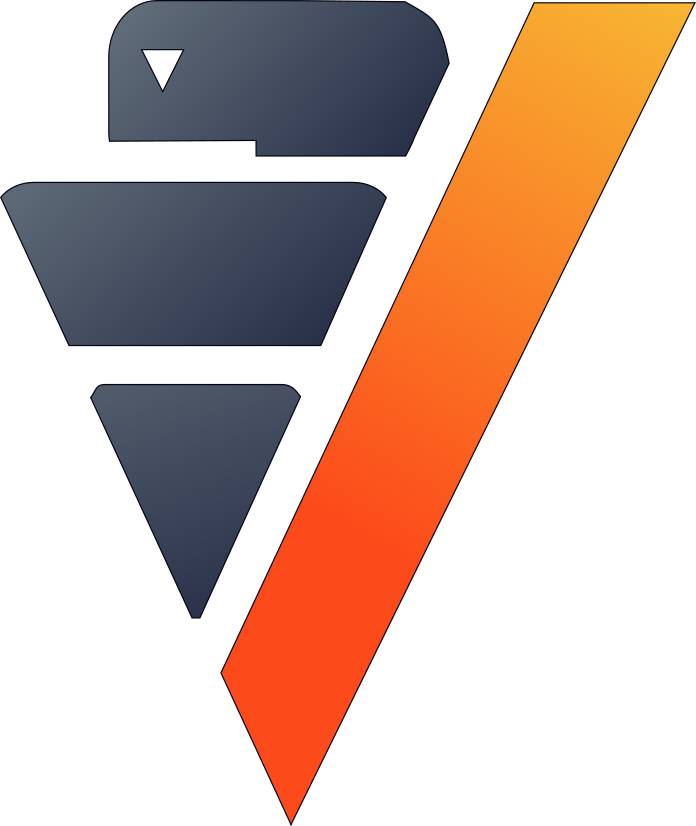

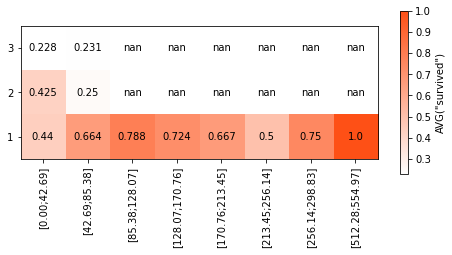

In [12]:
vdf.pivot_table(["pclass", "fare"], 
                method = "avg",
                of = "survived")

Box plots are useful to understand variables dispersion.

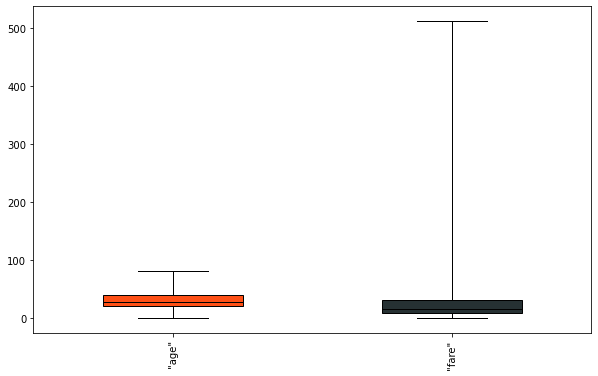

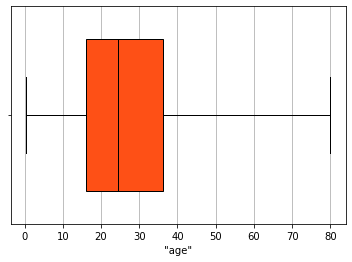

In [13]:
vdf.boxplot(columns = ["age", "fare"])
vdf["age"].boxplot()

It is also possible to understand many patterns using scatter and bubble plots. However, these methods are not using aggregations. That's why VerticaPy will downsample the data before plotting. A parameter 'max_nb_points' can be to use to avoid heavy memory usage during the drawing.

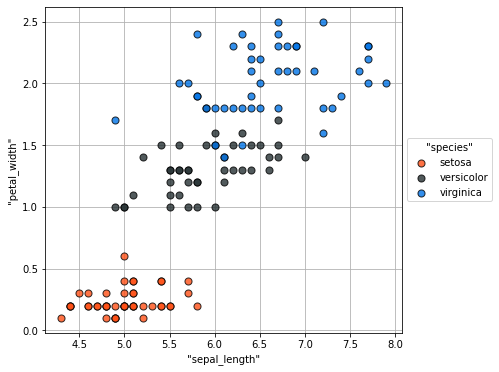

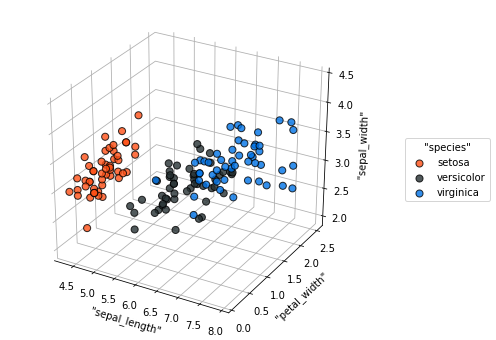

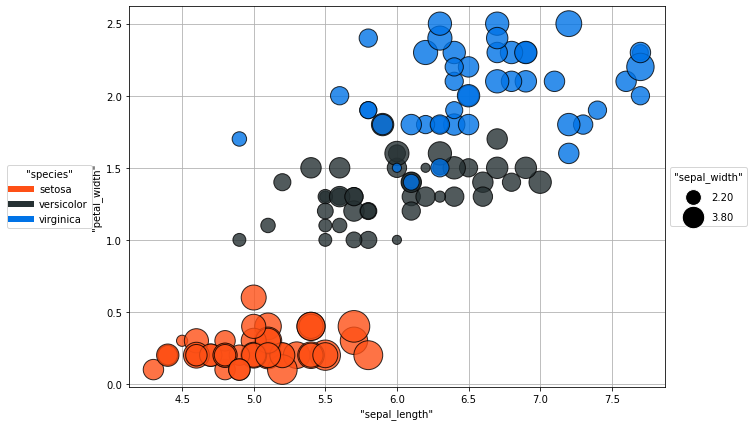

In [14]:
vdf = vDataFrame("public.iris")
vdf.scatter(["Sepal_Length", "Petal_Width"], 
            catcol = "Species", 
            max_nb_points = 1000)
vdf.scatter(["Sepal_Length", "Petal_Width", "Sepal_Width"], 
            catcol = "Species", 
            max_nb_points = 1000)
vdf.bubble(["Sepal_Length", "Petal_Width"], 
            size_bubble_col = "Sepal_Width",
            catcol = "Species", 
            max_nb_points = 1000)

Hexbin Plots can be to use to get heatmaps. 

They will compute aggregations to get the final results and they are a way to summarize scatter plots.

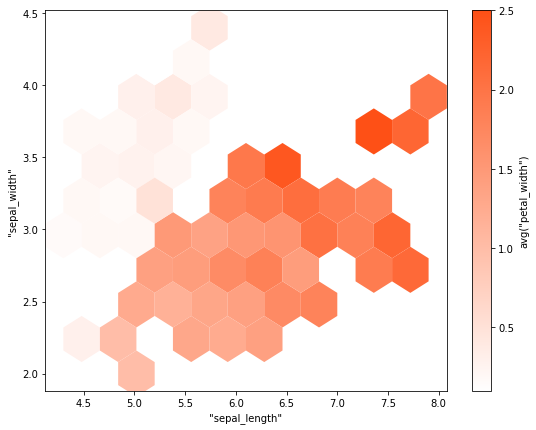

In [15]:
vdf.hexbin(["Sepal_Length", "Sepal_Width"], 
            method = "avg", 
            of = "Petal_Width")

Graphics help us to understand our data to take suitable decisions. 

Another important topic is to look at the link between the different variables. That's the main subject of our next lesson !

## Responsive Charts

Install python-highchart first!

In [16]:
titanic = vDataFrame("titanic")
titanic.hchart(x = "embarked",
               y = "pclass",
               z = "ROUND(AVG(survived), 2)",
               kind = "heatmap")

In [17]:
# Correlation Matrix
titanic.hchart(kind = "pearson")

In [18]:
titanic.hchart(x = "pclass",
               y = "AVG(survived)",
               kind = "bar")